In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [25]:
matches_info = pd.read_csv("../data/IPL_Results(2008-2020)_changed.csv")
matches_info

,Team1,Team2,Time,Place,Result,winning_team,win_margin,win_type,winning_team.1,win_margin.1,win_type.1
0,RCB,KKR,02:30 PM GMT / 08:00 PM LOCAL,"M.Chinnaswamy Stadium, Bengaluru",Kolkata Knight Riders won by 140 runs,KKR,140.0,runs,KKR,140.0,runs
1,PBKS,CSK,11:30 AM GMT / 05:00 PM LOCAL,"Punjab Cricket Association IS Bindra Stadium, ...",Chennai Super Kings won by 33 runs,CSK,33.0,runs,CSK,33.0,runs
2,DC,RR,03:00 PM GMT / 08:30 PM LOCAL,"Arun Jaitley Stadium, Delhi",Delhi Daredevils won by 9 wickets (with 29 bal...,DC,9.0,wickets,DD,9.0,wickets
3,KKR,DCG,10:30 AM GMT / 04:00 PM LOCAL,"Eden Gardens, Kolkata",Kolkata Knight Riders won by 5 wickets (with 6...,KKR,5.0,wickets,KKR,5.0,wickets
4,MI,RCB,02:30 PM GMT / 08:00 PM LOCAL,"Wankhede Stadium, Mumbai",Royal Challengers Bangalore won by 5 wickets (...,RCB,5.0,wickets,RCB,5.0,wickets
...,...,...,...,...,...,...,...,...,...,...,...
114,KKR,MI,02:30 PM GMT / 08:00 PM LOCAL,"Eden Gardens, Kolkata",Kolkata Knight Riders won by 9 wickets (with 1...,KKR,9.0,wickets,KKR,9.0,wickets
115,RCB,MI,02:30 PM GMT / 08:00 PM LOCAL,"Dr DY Patil Sports Academy, Navi Mumbai",Mumbai Indians won by 35 runs,MI,35.0,runs,MI,35.0,runs
116,CSK,DCG,02:30 PM GMT / 08:00 PM LOCAL,"Dr DY Patil Sports Academy, Navi Mumbai",Chennai Super Kings won by 38 runs,CSK,38.0,runs,CSK,38.0,runs
117,RCB,DCG,02:30 PM GMT / 08:00 PM LOCAL,"Dr DY Patil Sports Academy, Navi Mumbai",Royal Challengers Bangalore won by 9 wickets (...,RCB,9.0,wickets,RCB,9.0,wickets


Add how the team won

In [28]:
import pandas as pd
import re

# Function to parse result
def parse_result(row):
    match = re.match(r"(.+?)\s+won by\s+(\d+)\s+(runs|wickets)", row)
    if match:
        return pd.Series({
            'winning_team': match.group(1),
            'win_margin': int(match.group(2)),
            'win_type': match.group(3)
        })
    else:
        return pd.Series({
            'winning_team': None,
            'win_margin': None,
            'win_type': None
        })

# Apply the function to the correct column name
parsed_columns = matches_info['Result'].apply(parse_result)

print(type(matches_info))

# Concatenate back to the same dataframe
matches_info = pd.concat([matches_info, parsed_columns], axis=1)

# Preview the results
print(matches_info[['Result', 'winning_team', 'win_type', 'win_margin']].head())


<class 'pandas.core.frame.DataFrame'>
                                              Result winning_team  \
0              Kolkata Knight Riders won by 140 runs          KKR   
1                 Chennai Super Kings won by 33 runs          CSK   
2  Delhi Daredevils won by 9 wickets (with 29 bal...           DC   
3  Kolkata Knight Riders won by 5 wickets (with 6...          KKR   
4  Royal Challengers Bangalore won by 5 wickets (...          RCB   

                  winning_team win_type win_type  win_margin  win_margin  
0        Kolkata Knight Riders     runs     runs       140.0       140.0  
1          Chennai Super Kings     runs     runs        33.0        33.0  
2             Delhi Daredevils  wickets  wickets         9.0         9.0  
3        Kolkata Knight Riders  wickets  wickets         5.0         5.0  
4  Royal Challengers Bangalore  wickets  wickets         5.0         5.0  


In [29]:
team_names  = matches_info['Team1'].unique()

In [30]:
team_abbrev = {
    'Mumbai Indians': 'MI',
    'Chennai Super Kings': 'CSK',
    'Royal Challengers Bangalore': 'RCB',
    'Kolkata Knight Riders': 'KKR',
    'Delhi Capitals': 'DC',
    'Delhi Daredevils': 'DD',  # older name for DC
    'Sunrisers Hyderabad': 'SRH',
    'Deccan Chargers': 'DCG',  # older team
    'Punjab Kings': 'PBKS',
    'Kings XI Punjab': 'KXIP',  # older name for PBKS
    'Rajasthan Royals': 'RR',
    'Gujarat Titans': 'GT',
    'Lucknow Super Giants': 'LSG',
    'Pune Warriors': 'PW',
    'Rising Pune Supergiants': 'RPS',
    'Rising Pune Supergiant': 'RPS',  # another variation
    'Gujarat Lions': 'GL',
    'Kochi Tuskers Kerala': 'KTK'
}


In [31]:
cols_to_replace = ['Team1', 'Team2', 'Toss', 'winner', 'winning_team']

for col in cols_to_replace:
    if col in matches_info.columns:
        matches_info[col] = matches_info[col].replace(team_abbrev)

In [32]:
# Strip all string values first
for col in ['Team1', 'Team2', 'toss_winner', 'winner', 'winning_team']:
    if col in matches_info.columns:
        matches_info[col] = matches_info[col].astype(str)

# Define mapping
team_abbrev = {
    'MUMBAI INDIANS': 'MI',
    'CHENNAI SUPER KINGS': 'CSK',
    'ROYAL CHALLENGERS BENGALURU': 'RCB',
    'KOLKATA KNIGHT RIDERS': 'KKR',
    'DELHI CAPITALS': 'DC',
    'DELHI DAREDEVILS': 'DC',
    'SUNRISERS HYDERABAD': 'SRH',
    'DECCAN CHARGERS': 'DCG',
    'PUNJAB KINGS': 'PBKS',
    'KINGS XI PUNJAB': 'PBKS',
    'RAJASTAN ROYALS': 'RR',
    'GUJURAT TITANS': 'GT',
    'Lucknow Super Giants': 'LSG',
    'PUNE WARRIORS': 'PW',
    'RISING PUNE SUPERGIANTS': 'RPS',
    'GUJURAT LIONS': 'GL',
    'KOCHI TUSKERS KERALA': 'KTK'
}

# Replace team names
for col in ['Team1', 'Team2', 'toss_winner', 'winner', 'winning_team']:
    if col in matches_info.columns:
        matches_info[col] = matches_info[col].replace(team_abbrev)


In [35]:
matches_info = matches_info.loc[:, ~matches_info.columns.duplicated()]

type(matches_info['winning_team'])

pandas.core.series.Series

Top 10 most wins team

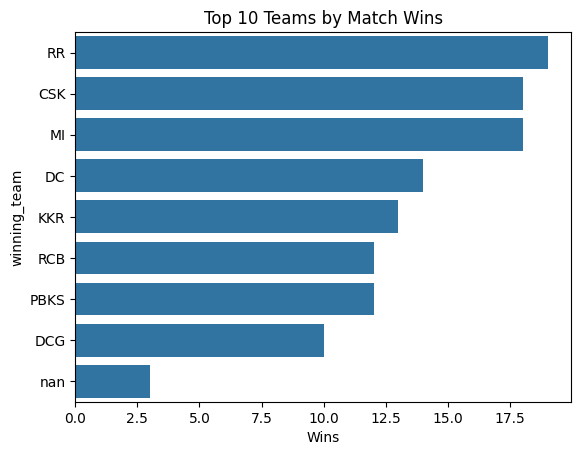

In [36]:
top_teams = matches_info['winning_team'].value_counts().head(10)
sns.barplot(x=top_teams.values, y=top_teams.index)
plt.title("Top 10 Teams by Match Wins")
plt.xlabel("Wins")
plt.show()

In [37]:
grouped = matches_info.groupby(['Place', 'win_type']).size().reset_index(name='new_result')
grouped

,Place,win_type,new_result
0,"Arun Jaitley Stadium, Delhi",runs,8
1,"Arun Jaitley Stadium, Delhi",wickets,5
2,"Barabati Stadium, Cuttack",runs,2
3,"Brabourne Stadium, Mumbai",runs,3
4,"Brabourne Stadium, Mumbai",wickets,4
5,"Dr DY Patil Sports Academy, Navi Mumbai",runs,6
6,"Dr DY Patil Sports Academy, Navi Mumbai",wickets,4
7,"Eden Gardens, Kolkata",runs,6
8,"Eden Gardens, Kolkata",wickets,8
9,"Himachal Pradesh Cricket Association Stadium, ...",wickets,2


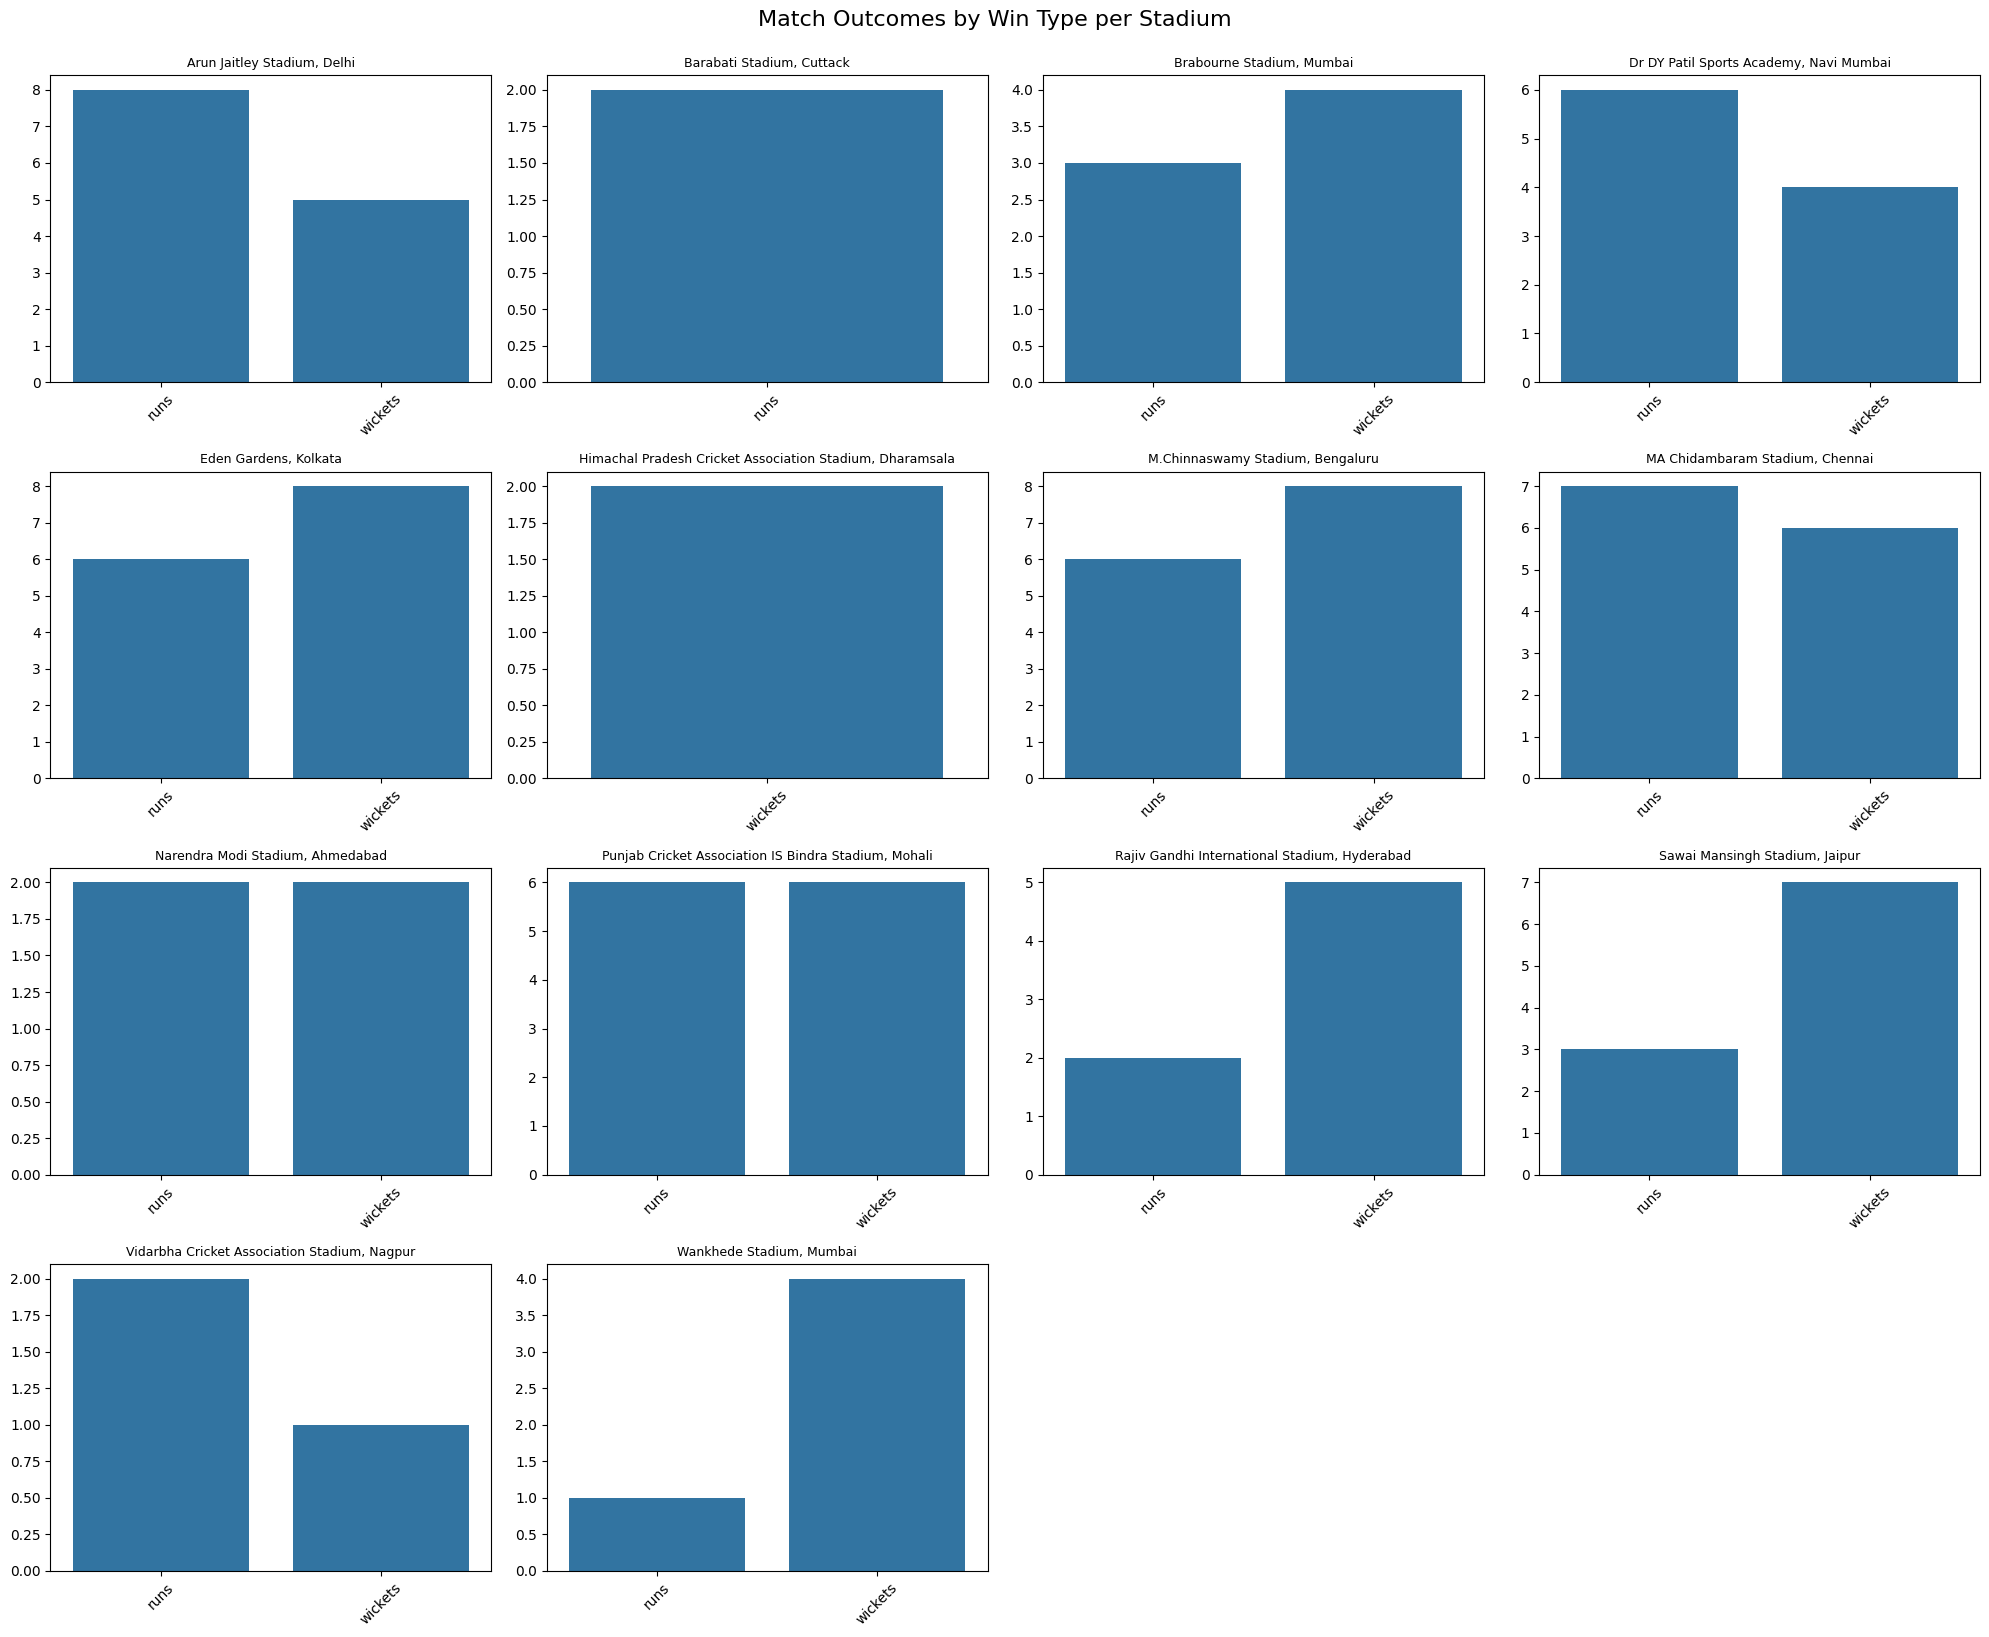

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Assuming your DataFrame is named df_venues
# First, get unique stadiums
stadiums = grouped['Place'].unique()

# Define grid size
n = len(stadiums)
cols = 4
rows = math.ceil(n / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()  # Flatten to easily iterate

# Plot each stadium
for i, stadium in enumerate(stadiums):
    ax = axes[i]
    temp = grouped[grouped['Place'] == stadium]
    sns.barplot(data=temp, x='win_type', y='new_result', ax=ax)
    ax.set_title(stadium, fontsize=9)
    ax.set_xlabel('')  # Optional: remove axis labels to save space
    ax.set_ylabel('')
    ax.tick_params(axis='x', rotation=45)

# Turn off unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.suptitle('Match Outcomes by Win Type per Stadium', fontsize=16, y=1.02)
plt.show()


In [39]:
grouped_team = matches_info.groupby(['winning_team', 'win_type']).size().reset_index(name='new_result 2')
grouped_team

,winning_team,win_type,new_result 2
0,CSK,runs,10
1,CSK,wickets,8
2,DC,runs,6
3,DC,wickets,8
4,DCG,runs,5
5,DCG,wickets,5
6,KKR,runs,8
7,KKR,wickets,5
8,MI,runs,10
9,MI,wickets,8


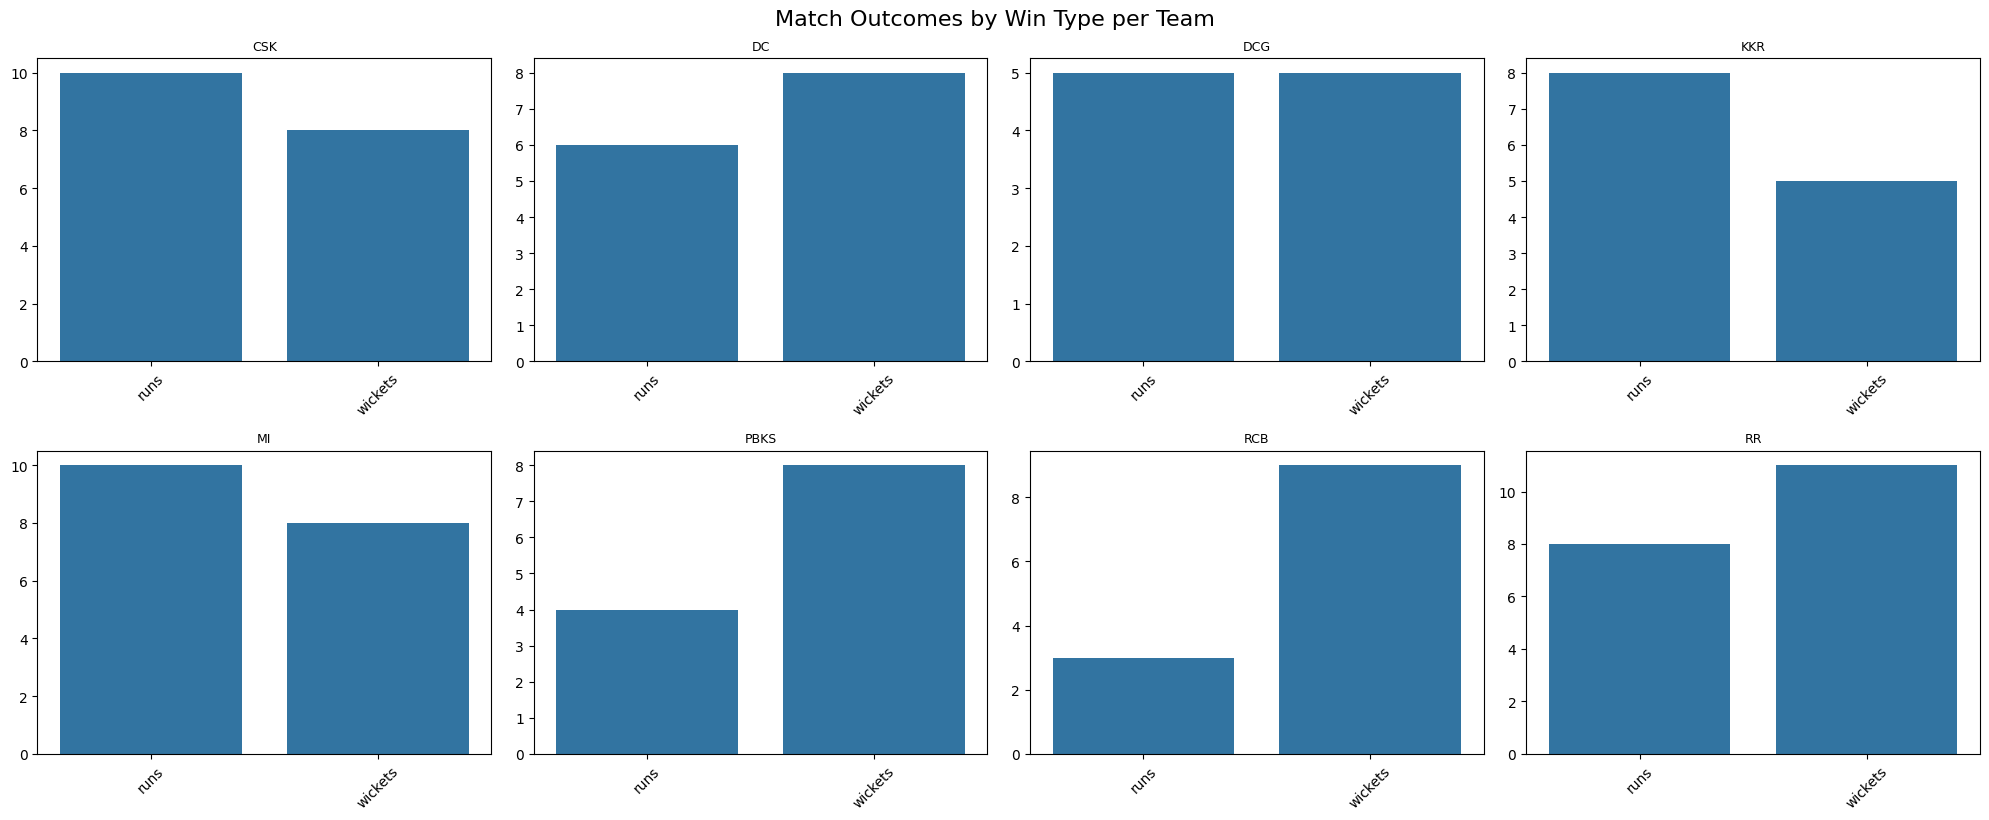

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Assuming your DataFrame is named df_venues
# First, get unique stadiums
teams = grouped_team['winning_team'].unique()

# Define grid size
n = len(teams)
cols = 4
rows = math.ceil(n / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()  # Flatten to easily iterate

# Plot each stadium
for i, team in enumerate(teams):
    ax = axes[i]
    temp = grouped_team[grouped_team['winning_team'] == team]
    sns.barplot(data=temp, x='win_type', y='new_result 2', ax=ax)
    ax.set_title(team, fontsize=9)
    ax.set_xlabel('')  # Optional: remove axis labels to save space
    ax.set_ylabel('')
    ax.tick_params(axis='x', rotation=45)

# Turn off unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.suptitle('Match Outcomes by Win Type per Team', fontsize=16, y=1.02)
plt.show()
